***
### How LightFM Works?
"A hybrid latent representation recommender model.

The model learns embeddings (latent representations in a high-dimensional space) for users and items in a way that encodes user preferences over items. When multiplied together, these representations produce scores for every item for a given user; items scored highly are more likely to be interesting to the user.

The user and item representations are expressed in terms of representations of their features: an embedding is estimated for every feature, and these features are then summed together to arrive at representations for users and items. For example, if the movie ‘Wizard of Oz’ is described by the following features: ‘musical fantasy’, ‘Judy Garland’, and ‘Wizard of Oz’, then its embedding will be given by taking the features’ embeddings and adding them together. The same applies to user features.

The embeddings are learned through stochastic gradient descent methods."

**source :https://making.lyst.com/lightfm/docs/index.html*

***

### Load Data

In [1]:
#load functions, packages, data etc.
%run ./All_Functions.py

products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")

#get data , choose rating column
rating_column='Quantity'
leave_one_out=False
in_topn_rate='-'
train , test , rating_column = load_dill(rating_column=rating_column,load_cv=False)


C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


### Leave One Out Test

##### removes from the train dataframe each customer's highest rated product 


In [2]:
# leave_one_out=True
# rating_column='Quantity'
# precision='-'
# recall='-'

# #create trainset 
# (loo_train,highest_rated_products ,rating_column)=Leave_highest_rating_out(dataframe=train)

# #to surprise format
# data,rating_column=read_data(data=loo_train,rating_column=rating_column,trainset=False,anti_test=False)
# train=loo_train


### Create Matrix Dataset

In [3]:
matrix = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=False)

#compressed matrix 
matrix_train = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
matrix_test = calculate_sparsity(data=test,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
                        
matrix_train, matrix_test                    

Sparsity: 0.97
Sparsity: 0.97
Sparsity: 0.98


(<5548x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 67107 stored elements in Compressed Sparse Row format>,
 <5548x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 46692 stored elements in Compressed Sparse Row format>)

In [4]:
matrix[:10]
 

ProductId,00BEC3E7-E598-E911-80CF-000D3AB18B8E,00D466F8-CD4E-EA11-A81F-000D3A497E15,014C107A-E898-E911-80CF-000D3AB18B8E,01C94D28-E498-E911-80CF-000D3AB18B8E,02BEC3E7-E598-E911-80CF-000D3AB18B8E,02D466F8-CD4E-EA11-A81F-000D3A497E15,035631AF-E498-E911-80CF-000D3AB18B8E,03B23102-BD9C-E911-80CF-000D3AB18B8E,0436347E-E498-E911-80CF-000D3AB18B8E,04D466F8-CD4E-EA11-A81F-000D3A497E15,...,FC693978-E498-E911-80CF-000D3AB18B8E,FCE44224-E798-E911-80CF-000D3AB18B8E,FD4D0E37-E598-E911-80CF-000D3AB18B8E,FE06929A-EC98-E911-80CF-000D3AB18B8E,FE162BF4-E598-E911-80CF-000D3AB18B8E,FEBDC3E7-E598-E911-80CF-000D3AB18B8E,FEDCF7C2-E898-E911-80CF-000D3AB18B8E,FEF78EB7-EB98-E911-80CF-000D3AB18B8E,FFAAAEB0-E598-E911-80CF-000D3AB18B8E,FFC84D28-E498-E911-80CF-000D3AB18B8E
CustomerId,,,,,,,,,,,,,,,,,,,,,
000CAC9C-AF57-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001C2C84-A312-EA11-A81C-000D3A497E15,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
002861E1-5721-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00382A56-9D15-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00459F71-952D-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
004D58CE-2A38-EA11-A81E-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0061F14B-F54F-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00621410-9212-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0064A8A3-1E33-EA11-A81D-000D3A497E15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Map IDs To Integers

##### Convert customer_ids and product_ids to integers as for the model's requirements.

In [5]:
customer_dict={}
for customer in enumerate(matrix.index):
    #{'Customer_ID':'0'}
    customer_dict[customer[1]]=customer[0]
    
product_dict={}    
for product in enumerate(matrix.columns):
    #{'Product_ID':'0'}
    product_dict[product[1]]=product[0]

## Training / Hyperparameter Tunning

In [6]:
# #train the model
model=LightFM(loss='warp')
model.fit(interactions=matrix_train, epochs=30 ,num_threads=1,verbose=True)


tuning_timing='-'
tuning_score='-'
tuning_metric='-'
num_samples='-'
# hyperparams= {} 
hyperparams={'epochs': 30,'loss':'warp'}

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [7]:
# hyperparameters ranges available 

# def sample_hyperparameters():
#     """
#     Yield possible hyperparameter choices.
#     """

#     while True:
#         yield {
#             "no_components": np.random.randint(16, 64),
#             "learning_schedule": np.random.choice(["adagrad", "adadelta"]),
#             #"loss": np.random.choice(["bpr", "warp", "warp-kos"]),
#             "loss": np.random.choice(["warp-kos", "warp"]), 
#             "learning_rate": np.random.exponential(0.05),
#             "item_alpha": np.random.exponential(1e-8),
#             "user_alpha": np.random.exponential(1e-8),
#             "max_sampled": np.random.randint(5, 15),
#             "num_epochs": np.random.randint(5, 50),
#         }

In [8]:
tuning_metric='Precision'
#hyperparameter tuning
(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
 hyperparams, model, num_samples, tuning_timing, tuning_metric )=hyperparameter_tuning(trainset=matrix_train, 
                                                                                        testset=matrix_test, tuning_metric='Precision', num_samples=12)

(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
hyperparams, model, num_samples, tuning_timing, tuning_metric)                                                                                        

(0.9996242,
 0.92313546,
 0.9493872,
 0.48929346,
 0.5267310473642199,
 0.3767105714626362,
 {'no_components': 57,
  'learning_schedule': 'adadelta',
  'loss': 'warp',
  'learning_rate': 0.01837064350662911,
  'item_alpha': 5.646147724135619e-09,
  'user_alpha': 3.0900271153985814e-08,
  'max_sampled': 8,
  'num_epochs': 34},
 12,
 242.1047203540802,
 'Precision')

In [9]:
tuning_score= test_precision

## Get Recommendations

In [10]:
N=5
recommendations=topn_recommedation(train=matrix,model=model,
            customer_dict=customer_dict,product_dict=product_dict,products_df=products_df,customers_df=customers_df,N=N)
recommendations[:5]

,CustomerName,Top5,Top5_Ids
000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,"[CAP CALDO REGULAR BRAZILIAN, FREDDO REGULAR B...","[CADC48A5-E998-E911-80CF-000D3AB18B8E, E3E5129..."
001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,"[LIFE ΜΑΝΤΑΡΙΝΙ 400ml PET, CAP CALDO REGULAR A...","[055631AF-E498-E911-80CF-000D3AB18B8E, 3BC57A9..."
002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,"[ΠΙΤΣΑ ΣΚΕΠΑΣΤΗ, CALDO SINGLE ARABICA, ΧΕΙΡΟΠ....","[F77F8C55-E998-E911-80CF-000D3AB18B8E, FE06929..."
00382A56-9D15-EA11-A81C-000D3A497E15,Tatiana Tarasenko,"[ESPRESSO FREDDO ARABICA, ESPRESSO FREDDO BRAZ...","[0DC57A94-EC98-E911-80CF-000D3AB18B8E, A408E89..."
00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO AR...","[3BC57A94-EC98-E911-80CF-000D3AB18B8E, 0DC57A9..."


### Look Into Recommendation Results

In [11]:
#top recommendations 
topn=count_topn_occurances(recommendations)
topn

Unique Topn: 5514


,Top5,Times_recommended,top1,top2,top3,top4,top5
0,"[ESPRESSO FREDDO ARABICA, ΑΥΡΑ ΝΕΡΟ 0,5L, FRED...",4,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",FREDDO REGULAR ARABICA,CAP CALDO REGULAR BRAZILIAN,ESPRESSO FREDDO BRAZILIAN
1,"[CAP CALDO REGULAR ARABICA, ΑΥΡΑ ΝΕΡΟ 0,5L, ES...",3,CAP CALDO REGULAR ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,FREDDO REGULAR ARABICA
2,"[ESPRESSO FREDDO ARABICA, ΑΥΡΑ ΝΕΡΟ 0,5L, ESPR...",3,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,ESPR CALDO REGULAR ARABICA
3,"[ESPRESSO FREDDO ARABICA, CAP CALDO REGULAR AR...",3,ESPRESSO FREDDO ARABICA,CAP CALDO REGULAR ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN
4,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO BR...",3,CAP CALDO REGULAR ARABICA,ESPRESSO FREDDO BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L",CAP CALDO REGULAR BRAZILIAN,FREDDO REGULAR ARABICA
...,...,...,...,...,...,...,...
5509,"[MILKO 500ml (ΜΠΟΥΚΑΛΙ), ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥ...",1,MILKO 500ml (ΜΠΟΥΚΑΛΙ),ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.,ΜΠΡΙΟΣ ΓΑΛΟΠΟΥΛΑ-ΤΥΡΙ PHILADELPHIA,ΚΑΣ. ΜΕ ΝΙΦΑΔΕΣ ΚΑΛΑΜΠΟΚΙΟΥ,ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ
5510,"[COCA COLA ΚΥΤΙΟ 0,33L, BIG BURGER, ΑΥΡΑ ΝΕΡΟ ...",1,"COCA COLA ΚΥΤΙΟ 0,33L",BIG BURGER,"ΑΥΡΑ ΝΕΡΟ 0,5L",MUFFIN MERENDA,ΧΕΙΡ.ΚΟΥΛ.ΘΕΣ/ΚΗΣ ΖΑΜΠΟΝ
5511,"[ΑΥΡΑ ΝΕΡΟ 0,5L, ESPRESSO FREDDO ARABICA, FRED...",1,"ΑΥΡΑ ΝΕΡΟ 0,5L",ESPRESSO FREDDO ARABICA,FREDDO REGULAR BRAZILIAN,ΧΕΙΡΟΠ. ΖΑΜΠΟΝΟΤΥΡΟΠΙΤΑ,ESPR CALDO REGULAR ARABICA
5512,"[FREDDOCINO CLASSIC GRANDE, ΠΟΛΥΣ. ΜΠΑΓΚ.(ΓΑΛΟ...",1,FREDDOCINO CLASSIC GRANDE,ΠΟΛΥΣ. ΜΠΑΓΚ.(ΓΑΛΟΠΟΥΛΑ-ΤΥΡΙ DIROLLO),ΝΕΟ DONUT BUENO & COOKIES,ΚΟΥΛΟΥΡΙ ΘΕΣΣΑΛΟΝΙΚΗΣ,ΣΟΚΟΛΑΤΑ 50% ΚΑΚΑΟ 25ΓΡ


In [12]:
#unique recommendations   
unique_topNs=topn.shape[0] / train['CustomerId'].nunique() * 100
print("Unique recommendations per customer: {0}%".format(round(unique_topNs ,2)))

Unique recommendations per customer: 99.39%


In [13]:
product_popularity_in_recommendations(recommendation_df=recommendations,N=N)

Unique products in all TopN: 370 


{'ΑΥΡΑ ΝΕΡΟ 0,5L': 1579,
 'ESPRESSO FREDDO ARABICA': 1430,
 'CAP CALDO REGULAR ARABICA': 1130,
 'ESPRESSO FREDDO BRAZILIAN': 1060,
 'CAP CALDO REGULAR BRAZILIAN': 894,
 'FREDDO REGULAR ARABICA': 741,
 'ESPR CALDO REGULAR ARABICA': 590,
 'FREDDO REGULAR BRAZILIAN': 559,
 'CALDO GRANDE ARABICA': 515,
 'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ': 496,
 'CALDO GRANDE BRAZILIAN': 395,
 'ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ': 393,
 'ΠΙΤΣΑ ΣΚΕΠΑΣΤΗ': 391,
 'ESPR CALDO REGULAR BRAZILIAN': 389,
 'FRAPPE REGULAR': 363,
 'CALDO SINGLE ARABICA': 362,
 'ΚΟΥΛΟΥΡΙ ΘΕΣΣΑΛΟΝΙΚΗΣ': 310,
 'CALDO SINGLE BRAZILIAN': 297,
 'ΜΠΟΥΓΑΤΣΑ ΚΩΝ/ΠΟΛΗΣ ΜΕ ΚΡΕΜΑ': 291,
 'ESPR CALDO SINGLE BRAZILIAN': 280,
 'ΤΟΣΤ': 270,
 'ΤΥΡΟΠΙΤΑ PHILADELPHIA': 267,
 'FREDDO GRANDE BRAZILIAN': 252,
 'RISTRETO CALDO REGULAR BRAZILIAN': 252,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR': 250,
 'ΦΡΕΣΚΟΣ ΧΥΜΟΣ ΠΟΡΤΟΚΑΛΙ 330 ML': 233,
 'ΧΕΙΡΟΠ. ΖΑΜΠΟΝΟΤΥΡΟΠΙΤΑ': 232,
 'ΧΕΙΡ.ΚΟΥΛ.ΘΕΣ/ΚΗΣ ΓΑΛΟΠΟΥΛΑ': 230,
 'HOT CHOCOLATE REGULAR': 227,
 'ΑΥΡΑ ACTIVE CAP 750ml': 223,
 'ΚΟΥΛΟΥΡΙ ΣΙΚΑΛΗΣ ΘΕΣ.': 

In [14]:
unique_TopN_products=len(product_popularity_in_recommendations(recommendation_df=recommendations,N=N)) / train['ProductId'].nunique() *100
print("Unique products in recommendations : {0}%".format(round(unique_TopN_products ,2)))

Unique products in all TopN: 370 
Unique products in recommendations : 87.89%


In [15]:
count_product_in_topn(product_name='ESPRESSO FREDDO ARABICA',recommendations=recommendations)

False    4118
True     1430
Name: topn_to_str, dtype: int64

## Hit Rate

In [16]:
#hit rate 
(hit_rate ,hits ,count_customers ,timing ,products_in_hits ,threshold, customer_dictionaries) = calculate_accuracy(recommend=recommendations,
                        train=train,test=test,products_df=products_df,customers_df=customers_df,threshold=1,N=N,show=False)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [17]:
(hit_rate ,hits ,count_customers ,timing ,threshold)

(0.48, 2359, 4948, 344.49263978004456, 1)

In [18]:
#preview
products_in_hits[:5]

['CAP CALDO REGULAR ARABICA',
 'CAP CALDO REGULAR ARABICA',
 'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
 'ESPRESSO FREDDO REG.DECAF.',
 'ΚΑΣ. ΜΕ ΝΙΦΑΔΕΣ ΚΑΛΑΜΠΟΚΙΟΥ']

In [19]:
hit_popularity_matrix(hit_products=products_in_hits)


,Product,Hits
1,"ΑΥΡΑ ΝΕΡΟ 0,5L",523
2,ESPRESSO FREDDO ARABICA,427
3,ESPRESSO FREDDO BRAZILIAN,273
4,FREDDO REGULAR ARABICA,193
5,FREDDO REGULAR BRAZILIAN,133
...,...,...
167,LUNGO CALDO REGULAR BRAZILIAN,1
168,LIFE ΠΟΡΤΟΚΑΛΙ 400ml PET,1
169,LIFE ΠΟ-ΓΚΡΕΙΠ-ΣΑ 400ml PET,1
170,LIFE ΜΗ-ΠΟ-KA 400ml PET,1


In [20]:
#Recommendation Results for each customer
customer_dictionaries[:2]

[defaultdict(int,
             {'CustomerId': '000CAC9C-AF57-EA11-A81F-000D3A497E15',
              'CustomerName': 'Σπύρος Οικονόμου',
              'Recommendations': ['CAP CALDO REGULAR BRAZILIAN',
               'FREDDO REGULAR BRAZILIAN',
               'CAP CALDO REGULAR ARABICA',
               'ΑΥΡΑ ΝΕΡΟ 0,5L',
               'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR'],
              'Will_buy': ['ESPRESSO FREDDO ARABICA',
               'ΧΕΙΡΟΠ. ΑΥΘ. ΠΟΛΙΤΙΚΗ ΚΟΥΡΟΥ',
               'ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ'],
              'Hits_number': 0,
              'Hits': [],
              'Prior_purchases': ['ESPRESSO FREDDO ARABICA',
               'FREDDO REGULAR ARABICA',
               'ESPRESSO FREDDO BRAZILIAN',
               'FRAPPE REGULAR',
               'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG',
               'ESPR CALDO REGULAR BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚ

## Presicion & Recall

In [21]:
#calculate presicion
ptemp=precision_at_k(model, matrix_test, k=N)
precision=ptemp.mean()
#round up precision avg 
precision = round( float(precision),2)
print('P mean: {0}'.format(precision))
#precision distribution
values, count= np.unique(ptemp,return_counts=True)
dict(zip(values,count))

P mean: 0.49


{0.0: 128, 0.2: 1041, 0.4: 1772, 0.6: 1605, 0.8: 837, 1.0: 165}

In [22]:
#calculate recall
rtemp=recall_at_k(model=model,test_interactions=matrix_test, k=N, check_intersections=False)
#round up array's numbers 
rtemp=np.round(rtemp,2)
#round up avg recall
recall=rtemp.mean()
recall=round(float(recall),2)
print('R mean: {0}'.format(recall))
#recall distribution
values, count= np.unique(rtemp,return_counts=True)
dict(zip(values,count))
# plt.plot(rtemp,'r.')

R mean: 0.38


{0.0: 128,
 0.03: 3,
 0.04: 5,
 0.05: 6,
 0.06: 28,
 0.07: 40,
 0.08: 50,
 0.09: 57,
 0.1: 64,
 0.11: 79,
 0.12: 118,
 0.13: 36,
 0.14: 146,
 0.15: 63,
 0.16: 20,
 0.17: 171,
 0.18: 104,
 0.19: 44,
 0.2: 238,
 0.21: 62,
 0.22: 131,
 0.23: 65,
 0.24: 21,
 0.25: 347,
 0.26: 6,
 0.27: 139,
 0.28: 3,
 0.29: 234,
 0.3: 94,
 0.31: 63,
 0.33: 506,
 0.36: 65,
 0.38: 188,
 0.4: 264,
 0.42: 14,
 0.43: 176,
 0.44: 80,
 0.45: 17,
 0.5: 630,
 0.56: 18,
 0.57: 90,
 0.6: 149,
 0.62: 11,
 0.67: 273,
 0.71: 12,
 0.75: 137,
 0.8: 47,
 0.83: 10,
 1.0: 296}

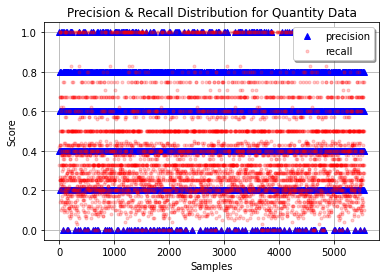

In [23]:
plt.plot(ptemp,'b^',label='precision')
plt.plot(rtemp,'r.',label='recall',alpha=0.2)
plt.legend(shadow=True)
plt.title('Precision & Recall Distribution for {0} Data'.format(rating_column))
plt.xlabel('Samples')
plt.ylabel('Score')
plt.grid()

## Update Logs

In [24]:
#update train log
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log              

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [25]:
# evaluate recommendations 

preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate='-',leave_one_out=leave_one_out,create_log=False)

preview                

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


## Leave One Out Evaluation 

In [27]:
train1 , test1 , rating_column = load_dill(rating_column=rating_column,load_cv=False)


In [28]:
customer=train['CustomerId'].drop_duplicates().sample(1).values[0]
df=leave_one_out_info(customer=customer,data=train1,removed_ratings=highest_rated_products,products_df=products_df,
                   customers_df=customers_df,rating_column=rating_column)
df

,index,Customer_Name,Product_Names,Quantity
0,17686,Κώστας Ο,ESPRESSO FREDDO ARABICA,2.000000
1,17687,Κώστας Ο,FREDDO REGULAR ARABICA,1.000000
2,17688,Κώστας Ο,CAP CALDO REGULAR ARABICA,1.000000
3,17689,Κώστας Ο,ESPRESSO FREDDO BRAZILIAN,9.000000
4,17690,Κώστας Ο,CAP CALDO REGULAR BRAZILIAN,33.000000
5,17691,Κώστας Ο,ESPR CALDO REGULAR BRAZILIAN,2.000000
6,17692,Κώστας Ο,FREDDO REGULAR BRAZILIAN,2.000000
7,17693,Κώστας Ο,ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ,1.000000
8,17690,Κώστας Ο,CAP CALDO REGULAR BRAZILIAN,33.000000


In [31]:
(in_topn_rate ,in_topn  , customerid_in_topn, time_passed) =LeaveOneOut_hitrate(left_out_products=highest_rated_products,recommendations=recommendations,N=N)


(in_topn_rate , in_topn , customerid_in_topn[:2])

(0.64,
 3560,
 ['000CAC9C-AF57-EA11-A81F-000D3A497E15',
  '001C2C84-A312-EA11-A81C-000D3A497E15'])

In [32]:
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log  

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [36]:
preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate=in_topn_rate ,leave_one_out=leave_one_out,create_log=False)

preview       

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-
